<center>
<h1> Assignment 2 </h1>
</center>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

## Data PreProcessing

In [2]:
data = pd.read_csv('test_table.csv')
data.head(n=10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0


In [3]:
data.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [4]:
data.dtypes

user_id              int64
date                object
source              object
device              object
browser_language    object
ads_channel         object
browser             object
conversion           int64
test                 int64
dtype: object

In [5]:
user=pd.read_csv('user_table.csv')
user.head(n=10)

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain
5,62371,M,29,Ecuador
6,987967,M,31,Spain
7,499510,F,29,Paraguay
8,364726,F,29,Colombia
9,572551,M,21,Bolivia


In [6]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [7]:
user.dtypes

user_id     int64
sex        object
age         int64
country    object
dtype: object

In [8]:
data=data.join(user.set_index('user_id'),on='user_id')

In [9]:
data.head(n=10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22.0,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


In [10]:
datatest=data.loc[data.country != 'Spain']
datatest1=datatest.groupby(by='test')

In [11]:
datatest1.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


age     conversion         user_id
test                                                    
0    count  185311.000000  185556.000000   185556.000000
     mean       27.143186       0.048330   500393.190557
     std         6.788499       0.214464   288943.391709
     min        18.000000       0.000000        1.000000
     25%              NaN       0.000000   249821.500000
     50%              NaN       0.000000   501139.000000
     75%              NaN       0.000000   750526.250000
     max        66.000000       1.000000  1000000.000000
1    count  215774.000000  215983.000000   215983.000000
     mean       27.115236       0.043425   499455.983452
     std         6.762929       0.203812   288506.173210
     min        18.000000       0.000000        3.000000
     25%              NaN       0.000000   249777.000000
     50%              NaN       0.000000   499094.000000
     75%              NaN       0.000000   748885.500000
     max        70.000000       1.000000   999999.000000

The mean for control is greater than the mean for test. However, we perform hypothesis tests to check for whether the effect is just by chance or if it indeed has an effect (in other words, does control have a better result than test just by chance or does it actually generalize to the entire population.

In [12]:
datalang=datatest.groupby(by='browser_language')

In [13]:
datalang.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


age     conversion           test  \
browser_language                                                      
EN               count   55883.000000   55941.000000   55941.000000   
                 mean       27.125673       0.044547       0.538675   
                 std         6.751022       0.206309       0.498506   
                 min        18.000000       0.000000       0.000000   
                 25%              NaN       0.000000       0.000000   
                 50%              NaN       0.000000       1.000000   
                 75%              NaN       0.000000       1.000000   
                 max        70.000000       1.000000       1.000000   
ES               count  334014.000000  334401.000000  334401.000000   
                 mean       27.124707       0.045903       0.537600   
                 std         6.781171       0.209275       0.498585   
                 min        18.000000       0.000000       0.000000   
                 25%              NaN       0.000000       0.000000   
                 50%              NaN       0.000000       1.000000   
                 75%              NaN       0.000000       1.000000   
                 max        66.000000       1.000000       1.000000   
Other            count   11188.000000   11197.000000   11197.000000   
                 mean       27.243296       0.045101       0.542556   
                 std         6.700849       0.207536       0.498208   
                 min        18.000000       0.000000       0.000000   
                 25%              NaN       0.000000       0.000000   
                 50%              NaN       0.000000       1.000000   
                 75%              NaN       0.000000       1.000000   
                 max        62.000000       1.000000       1.000000   

                               user_id  
browser_language                        
EN               count    55941.000000  
                 mean    500065.064836  
                 std     288123.130740  
                 min          1.000000  
                 25%     250787.000000  
                 50%     500104.000000  
                 75%     748015.000000  
                 max     999999.000000  
ES               count   334401.000000  
                 mean    499888.896244  
                 std     288747.889139  
                 min          2.000000  
                 25%     249889.000000  
                 50%     499765.000000  
                 75%     749780.000000  
                 max    1000000.000000  
Other            count    11197.000000  
                 mean    499015.268018  
                 std     290466.059926  
                 min         23.000000  
                 25%     241036.000000  
                 50%     504638.000000  
                 75%     750654.000000  
                 max     999921.000000

As can be seen, the conversion rates are not influenced much by the browser language.

The age distribution is more or less uniform with a few NaN values. Let us remove those.

In [14]:
datatest=datatest.loc[data.age >= 0]

In [15]:
datalang=datatest.groupby(('browser_language','test'))
datalang.describe()

age     conversion         user_id
browser_language test                                                    
EN               0    count   25777.000000   25777.000000    25777.000000
                      mean       27.137254       0.046825   500332.940528
                      std         6.786020       0.211267   288216.334253
                      min        18.000000       0.000000        1.000000
                      25%        22.000000       0.000000   249704.000000
                      50%        26.000000       0.000000   501066.000000
                      75%        31.000000       0.000000   748596.000000
                      max        63.000000       1.000000   999996.000000
                 1    count   30106.000000   30106.000000    30106.000000
                      mean       27.115758       0.042616   499864.461569
                      std         6.721008       0.201993   288082.697714
                      min        18.000000       0.000000       33.000000
                      25%        22.000000       0.000000   251842.750000
                      50%        26.000000       0.000000   498892.500000
                      75%        31.000000       0.000000   747599.000000
                      max        70.000000       1.000000   999999.000000
ES               0    count  154416.000000  154416.000000   154416.000000
                      mean       27.138904       0.048622   500539.358894
                      std         6.792005       0.215077   289046.774946
                      min        18.000000       0.000000        2.000000
                      25%        22.000000       0.000000   250073.500000
                      50%        26.000000       0.000000   501124.500000
                      75%        31.000000       0.000000   751095.000000
                      max        66.000000       1.000000  1000000.000000
                 1    count  179598.000000  179598.000000   179598.000000
                      mean       27.112501       0.043519   499343.252436
                      std         6.771837       0.204024   288508.831184
                      min        18.000000       0.000000        3.000000
                      25%        22.000000       0.000000   249789.500000
                      50%        26.000000       0.000000   498850.000000
                      75%        31.000000       0.000000   748850.000000
                      max        65.000000       1.000000   999998.000000
Other            0    count    5118.000000    5118.000000     5118.000000
                      mean       27.302267       0.045721   495760.510160
                      std         6.693890       0.208900   289519.271305
                      min        18.000000       0.000000      596.000000
                      25%        22.000000       0.000000   242390.000000
                      50%        26.000000       0.000000   501063.500000
                      75%        31.000000       0.000000   742703.500000
                      max        62.000000       1.000000   999784.000000
                 1    count    6070.000000    6070.000000     6070.000000
                      mean       27.193575       0.044152   501754.766886
                      std         6.706860       0.205449   291365.922065
                      min        18.000000       0.000000       23.000000
                      25%        22.000000       0.000000   240839.750000
                      50%        26.000000       0.000000   508325.500000
                      75%        31.000000       0.000000   756691.500000
                      max        60.000000       1.000000   999921.000000

In [16]:
datacountry=datatest.groupby(by='country')
datacountry.describe()

age    conversion          test        user_id
country                                                                 
Argentina count  46733.000000  46733.000000  46733.000000   46733.000000
          mean      27.131064      0.013994      0.799799  499067.041555
          std        6.778291      0.117468      0.400155  288283.945760
          min       18.000000      0.000000      0.000000       5.000000
          25%       22.000000      0.000000      1.000000  249851.000000
          50%       26.000000      0.000000      1.000000  499217.000000
          75%       31.000000      0.000000      1.000000  749055.000000
          max       61.000000      1.000000      1.000000  999998.000000
Bolivia   count  11124.000000  11124.000000  11124.000000   11124.000000
          mean      27.096908      0.048634      0.501079  498211.608504
          std        6.770174      0.215110      0.500021  288436.878481
          min       18.000000      0.000000      0.000000      25.000000
          25%       22.000000      0.000000      0.000000  248838.750000
          50%       26.000000      0.000000      1.000000  496377.500000
          75%       31.000000      0.000000      1.000000  747807.250000
          max       59.000000      1.000000      1.000000  999973.000000
Chile     count  19737.000000  19737.000000  19737.000000   19737.000000
          mean      27.210569      0.049704      0.500785  501589.603841
          std        6.834235      0.217337      0.500012  288027.130286
          min       18.000000      0.000000      0.000000       1.000000
          25%       22.000000      0.000000      0.000000  253190.000000
          50%       26.000000      0.000000      1.000000  501257.000000
          75%       31.000000      0.000000      1.000000  750654.000000
          max       61.000000      1.000000      1.000000  999966.000000
Colombia  count  54060.000000  54060.000000  54060.000000   54060.000000
          mean      27.142693      0.051332      0.498927  499124.463245
          std        6.739954      0.220676      0.500003  288649.075863
          min       18.000000      0.000000      0.000000       2.000000
          25%       22.000000      0.000000      0.000000  249183.500000
          50%       26.000000      0.000000      0.000000  498741.500000
...                       ...           ...           ...            ...
Paraguay  std        6.735847      0.215597      0.500024  289233.786295
          min       18.000000      0.000000      0.000000      13.000000
          25%       22.000000      0.000000      0.000000  248517.500000
          50%       26.000000      0.000000      1.000000  496776.000000
          75%       31.000000      0.000000      1.000000  745111.000000
          max       57.000000      1.000000      1.000000  999839.000000
Peru      count  33666.000000  33666.000000  33666.000000   33666.000000
          mean      27.171003      0.050258      0.498931  499840.637795
          std        6.818459      0.218481      0.500006  289002.145989
          min       18.000000      0.000000      0.000000      19.000000
          25%       22.000000      0.000000      0.000000  249104.750000
          50%       26.000000      0.000000      0.000000  502708.500000
          75%       31.000000      0.000000      1.000000  750675.750000
          max       63.000000      1.000000      1.000000  999977.000000
Uruguay   count   4134.000000   4134.000000   4134.000000    4134.000000
          mean      27.009192      0.012821      0.899613  501791.687228
          std        6.744905      0.112513      0.300552  291448.723729
          min       18.000000      0.000000      0.000000     321.000000
          25%       22.000000      0.000000      1.000000  251665.250000
          50%       26.000000      0.000000      1.000000  496124.000000
          75%       31.000000      0.000000      1.000000  762388.250000
          max       65.000000      1.000000      1.000000  999914.000000
Venezuela c

Next, we explore the country distributions for the online traffic.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


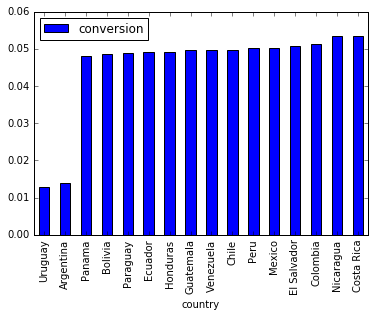

In [17]:
countrystats=datatest.groupby('country')['conversion'].mean()
countrystats=pd.DataFrame(countrystats)
countrystats=countrystats.sort('conversion')
countrystats.plot(kind='bar')